In [252]:
import config
C = config.get_config('./config/045_components.yml')

In [2]:
from dataset import *
from loss import *

MORPH ERODE MAX SIZE =  4
MORPH DILATE MAX SIZE =  4
parts: ['ঁ' 'ং' 'ঃ' 'অ' 'আ' 'ই' 'ঈ' 'উ' 'ঊ' 'ঋ' 'এ' 'ঐ' 'ও' 'ঔ' 'ক' 'খ' 'গ' 'ঘ'
 'ঙ' 'চ' 'ছ' 'জ' 'ঝ' 'ঞ' 'ট' 'ঠ' 'ড' 'ঢ' 'ণ' 'ত' 'থ' 'দ' 'ধ' 'ন' 'প' 'ফ'
 'ব' 'ভ' 'ম' 'য' 'র' 'ল' 'শ' 'ষ' 'স' 'হ' 'া' 'ি' 'ী' 'ু' 'ূ' 'ৃ' 'ে' 'ৈ'
 'ো' 'ৌ' '্' 'ৎ' 'ড়' 'ঢ়' 'য়']
train_labels_comp.shape (200840, 61)
train_labels_comp [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
train_labels_comp [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
train_labels_comp [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
train_labels (200840, 64)
weight [4.46346318 4.5

In [3]:
t, v = get_trainval_dataset_png()

(200840,)
(200840, 64)
  image_id  fold
0  Train_0     3
1  Train_1     2
2  Train_2     4
3  Train_3     2
4  Train_4     1
pre-split fold loaded, valid_indices:(array([     9,     12,     20, ..., 200830, 200834, 200835]),)
train_dataset 160672 valid_dataset 40168


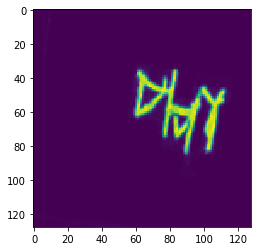

In [4]:
im, la = t[11]
plt.imshow(im[0])

# Autoaug

In [5]:
from autoaug import *
from PIL import Image
trans = ImageNetPolicy()
# trans = SVHNPolicy()

(137, 236)


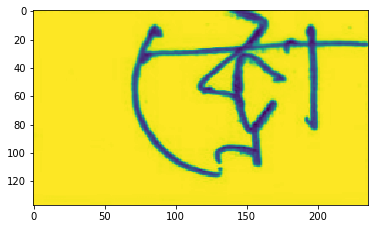

In [6]:
im = Image.open('../input/bengaliai-cv19-png/Train_0.png')

l = np.asarray( trans(im) )
print( l.shape )
plt.imshow( l )
    
plt.show()

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


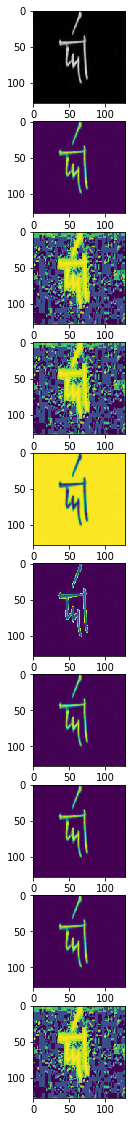

In [7]:
im, la = v[1]
# im = Image.fromarray( (255 * im[0]).astype(np.uint8) ).convert('RGB')
im = Image.fromarray( (255 * im[0]) ).convert('RGB')
# im = Image.fromarray( im[0] ).convert('RGB')

N=10
C=10
plt.figure(figsize=(20,20))
plt.subplot(C, N/C,1)
plt.imshow(im)

for n in range(1, N):
    plt.subplot(C, N/C,n+1)
    # plt.imshow( trans(im).convert('L') )
    
    l = np.asarray( trans(im).convert('L') )
    print( l.shape )
    plt.imshow( l )
    
plt.show()

(100, 100)


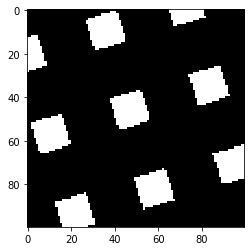

In [8]:
mat = mk_gridmask(100,100, 20, 60, 0.6)
print(mat.shape)
plt.imshow( mat, 'gray' )

In [9]:
masks = torch.Tensor(
    np.array([mk_gridmask(C.image_size[0], C.image_size[1], C.image_size[0]*0.2, C.image_size[0]*0.6, ratio=0.5) for _ in range(6)])
).cuda()

AttributeError: 'int' object has no attribute 'image_size'

In [ ]:
im, la = t[151]
#print( im.shape )
#print( la.shape )
print( la[0] )
print( la[1] )
print( la[2] )
print( im[0].max() )

import matplotlib.pyplot as plt
plt.imshow(im[0])
plt.show()

In [ ]:
p90 = np.percentile(im[0], 99.5 )
print( im[0].max())

plt.subplot(1,2,1)
plt.imshow( im[0] ) #, cmap='gray')
plt.subplot(1,2,2)
plt.imshow( np.clip( im[0] / p90, 0, 1 ) )#, cmap='gray')
plt.show()

In [ ]:
im, la = v[7]
print( la[0] )
print( la[1] )
print( la[2] )

import matplotlib.pyplot as plt
plt.imshow(im[0])
plt.show()

In [ ]:
t.image_ids[:5]

In [ ]:
v.image_ids[:5]

# Gridmix

In [ ]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(t, batch_size=128, shuffle=True)

In [ ]:
i = 0
for x, y in dl:
    #print(y[0].shape)
    _x = x.cpu().numpy().copy()
    x = x.cuda()
    y = y.cuda()

    mix_x, mix_y1, mix_y2, mix_y3, _ = gridmix_multi_targets(x, y[:, 0], y[:, 1], y[:, 2], y[:,3:], alpha=1.0)
    print(mix_y2.cpu()[0])

    plt.figure(figsize=(17,17))
    plt.subplot(1,3,1)
    plt.imshow(_x[0][0])
    plt.subplot(1,3,2)
    plt.imshow(_x[1][0])
    plt.subplot(1,3,3)
    plt.imshow(mix_x.cpu()[0][0])
    plt.title("")
    plt.show()
    
    i += 1
    if i >= 5 : break

# Cut4Mix

In [72]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(t, batch_size=2, shuffle=True)

In [123]:
a = np.array([1,2,3])
a[:-1] = -1

a

array([-1, -1,  3])

paste
lam tensor([0.7500, 1.0000], dtype=torch.float64)


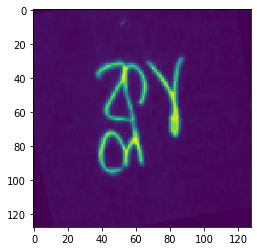

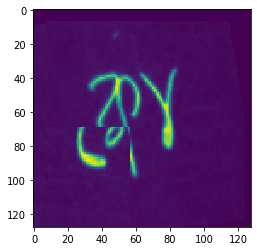

In [247]:
def _bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    hmin, hmax = np.where(rows)[0][[0, -1]]
    wmin, wmax = np.where(cols)[0][[0, -1]]
    return hmin, hmax, wmin, wmax

def pick_center(img):  # img: [1,H,W]
    img = img.cpu().numpy()
    if False:
        plt.subplot(1,2,1)
        plt.imshow(x[0][0].cpu().numpy())

    # threth = np.percentile(img, 80)
    threth = img.min() + 0.4 * (img.max() - img.min())

    img_bin = img >= threth
    hmin, hmax, wmin, wmax = _bbox(img_bin)
    hcenter = (hmin + hmax) // 2
    wcenter = (wmin + wmax) // 2

    img_bin = img_bin.astype(float)
    img_bin[hcenter-5:hcenter+5, wcenter-5:wcenter+5] = 0.2
    if False:
        plt.subplot(1,2,2)
        plt.imshow(img_bin)
        plt.show()
    return hcenter, wcenter
    

def shift_img(_i, dh, dw):
    _i = np.roll(_i, dh, axis=0)
    _i = np.roll(_i, dw, axis=1)
    if dh >= 0:
        _i[: dh] = 0.
    else:
        _i[ dh: ] = 0.
    if dw >= 0:
        _i[:, : dw] = 0.
    else:
        _i[:, dw: ] = 0.
    return _i

def cut4mix_multi_targets(data, targets1, targets2, targets3, targets4):
    batch, c, h, w = data.size()
    # targets1, targets2, targets3 = onehot(targets1, 168), onehot(targets2, 11), onehot(targets3, 7)
    ## pick_center(data[0, 0])

    ### indices = torch.randperm(data.size(0))
    indices = torch.tensor([1,0], dtype=torch.int64)
    shuffled_data = data[indices]
    
    out = np.zeros((batch,h,w))
    lam = np.zeros(batch)
    for b in range(batch):
        JIT = h // 8
        ch = np.random.randint(h//2-JIT, h//2+JIT) 
        cw = np.random.randint(w//2-JIT, w//2+JIT)
        
        hh, ww = pick_center(data[b, 0]) + np.random.randint(-1, 2, size=(2))
        _i  = shift_img(data[b,0].cpu().numpy(), ch - hh, cw - ww)

        hh, ww = pick_center(data[indices][b,0]) + np.random.randint(-1, 2, size=(2))
        _i2 = shift_img(data[indices][b,0].cpu().numpy(), ch - hh, cw - ww)

        cnt = 0
        out[b] = _i
        if np.random.rand() > 0.5:
            print("paste")
            out[b][:ch, :cw] = _i2[:ch, :cw]
            cnt += 1
        if np.random.rand() > 0.5:
            print("paste")
            out[b][:ch, cw:] = _i2[:ch, cw:]
            cnt += 1
        if np.random.rand() > 0.5:
            print("paste")
            out[b][ch:, :cw] = _i2[ch:, :cw]
            cnt += 1
        if np.random.rand() > 0.5:
            print("paste")
            out[b][ch:, cw:] = _i2[ch:, cw:]
            cnt += 1
        lam[b] = 1 - cnt/4.

    # lam = np.random.beta(alpha, alpha)
    # bbx1, bby1, bbx2, bby2 = rand_bbox(data.size(), lam)
    lam = torch.tensor(lam)
    # data[:, :, bbx1:bbx2, bby1:bby2] = data[indices, :, bbx1:bbx2, bby1:bby2]
    # adjust lambda to exactly match pixel ratio
    # lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (data.size()[-1] * data.size()[-2]))

    #shuffled_targets1 = targets1[indices]
    #shuffled_targets2 = targets2[indices]
    #shuffled_targets3 = targets3[indices]
    #shuffled_targets4 = targets4[indices]
    #t1 = lam*targets1 + (1-lam)*shuffled_targets1
    #t2 = lam*targets2 + (1-lam)*shuffled_targets2
    #t3 = lam*targets3 + (1-lam)*shuffled_targets3
    #t4 = lam*targets4 + (1-lam)*shuffled_targets4
    #return data, t1, t2, t3,  t4
    print("lam", lam)
    return out
for x, y in dl:
    out = cut4mix_multi_targets(x, None,None,None,None)
    plt.imshow(x.cpu().numpy()[0][0])
    plt.show()
    plt.imshow(out[0])
    plt.show()
    break

# Cutmix

In [65]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(t, batch_size=128, shuffle=True)

0.792236328125
keeped:  0.7922363


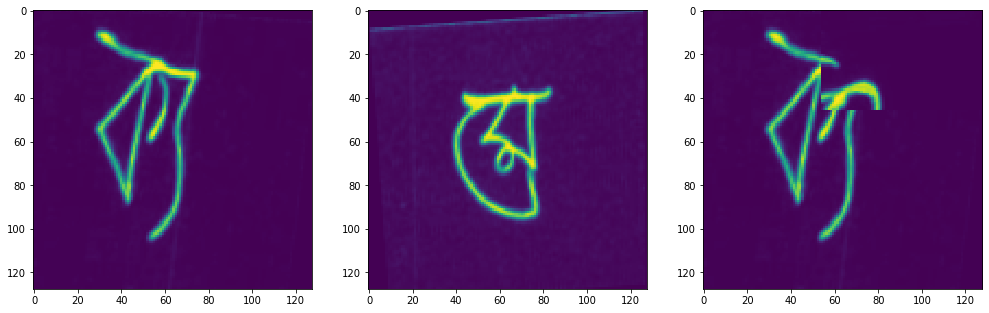

0.50335693359375
keeped:  0.50335693


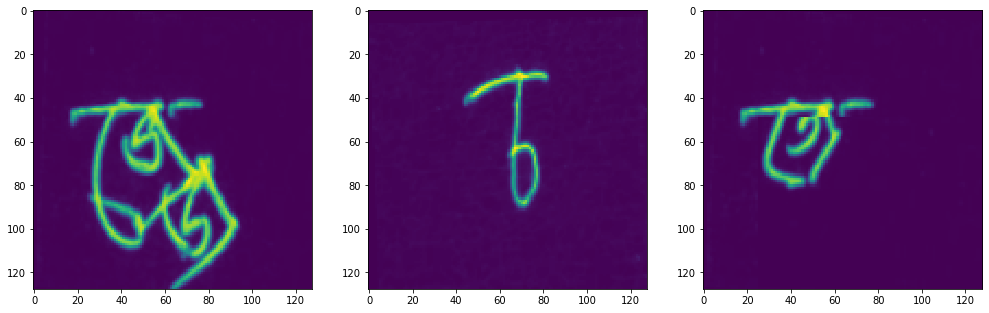

0.6495361328125
keeped:  0.64953613


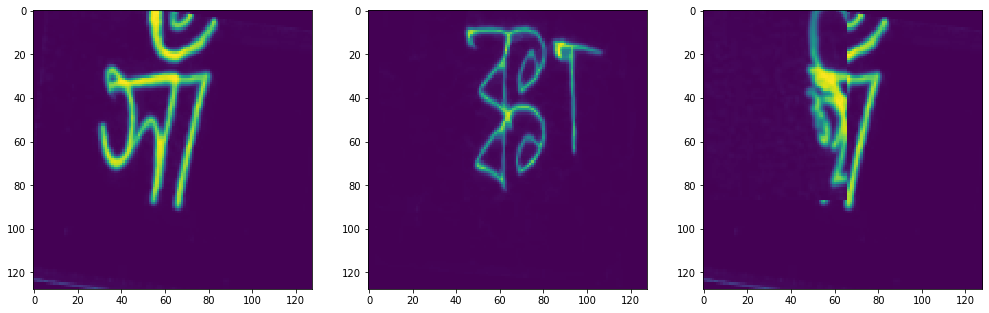

0.7802734375
keeped:  0.78027344


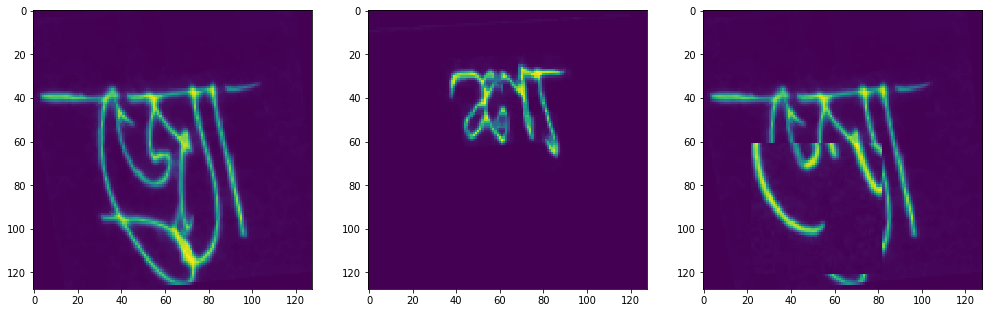

0.856201171875
keeped:  0.8562012


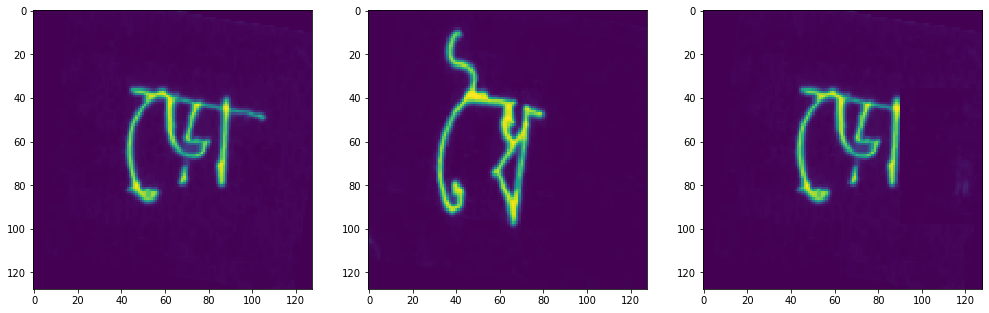

0.870849609375
keeped:  0.8708496


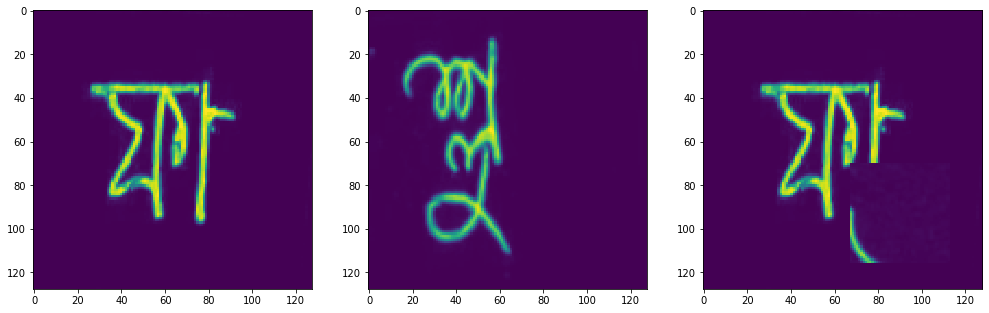

0.5745849609375
keeped:  0.57458496


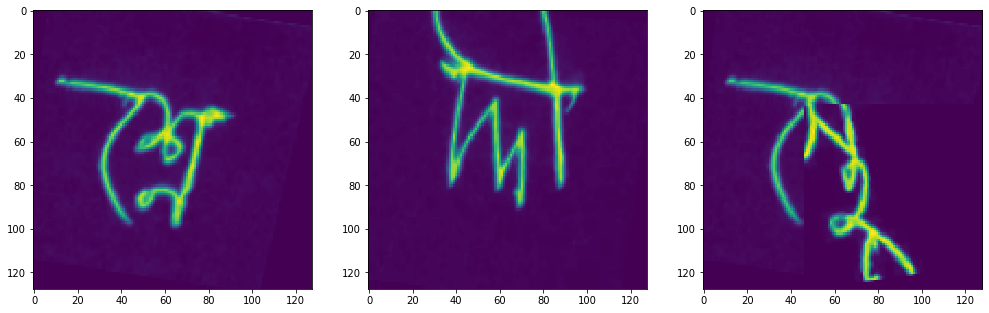

0.548583984375
keeped:  0.548584


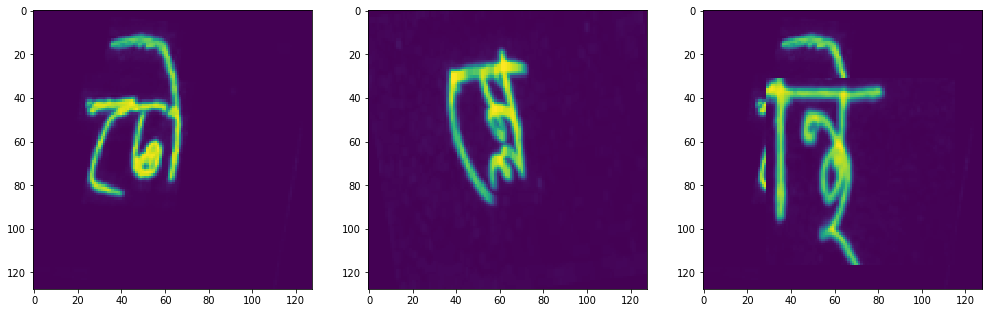

0.61962890625
keeped:  0.6196289


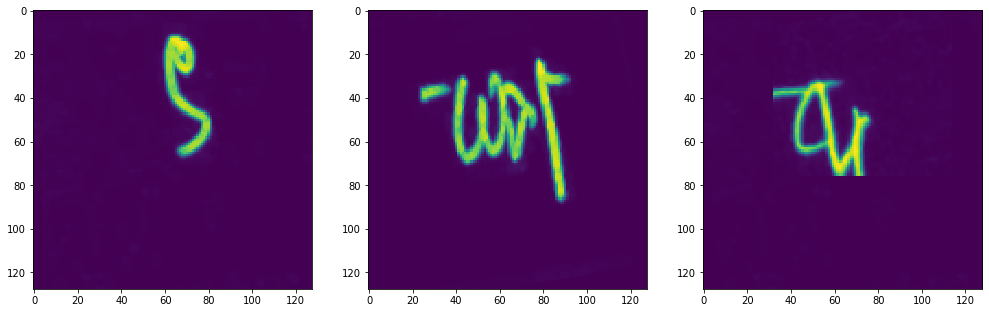

0.665771484375
keeped:  0.6657715


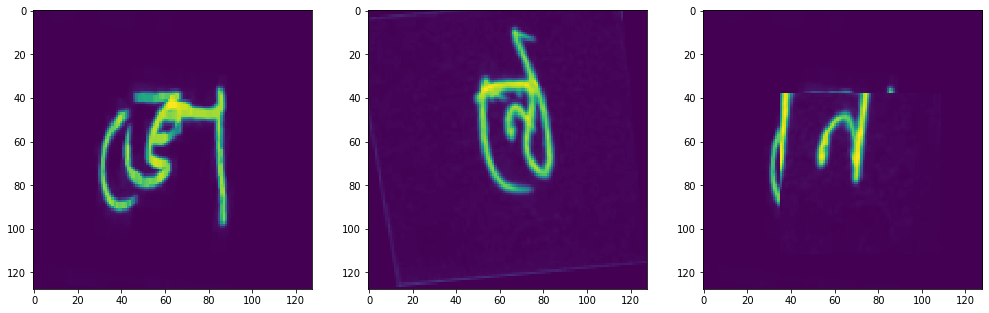

In [66]:
i = 0
for x, y in dl:
    #print(y[0].shape)
    _x = x.cpu().numpy().copy()
    _y = y.cpu().numpy().copy()
    x = x.cuda()
    y = y.cuda()

    mix_x, mix_y1, mix_y2, mix_y3, _ = cutmix_multi_targets(x, y[:, 0], y[:, 1], y[:, 2], y[:,3:], alpha=1.0)
    # print( sorted( mix_y1.cpu().numpy()[0]  )[-2:]  )
    print( "keeped: ", mix_y1.cpu().numpy()[ 0,  _y[0][0]  ]  )
    #print(mix_x.shape)
    #print(mix_y1.cpu()[0])

    plt.figure(figsize=(17,17))
    plt.subplot(1,3,1)
    plt.imshow(_x[0][0])
    plt.subplot(1,3,2)
    plt.imshow(_x[1][0])
    plt.subplot(1,3,3)
    plt.imshow(mix_x.cpu()[0][0])
    plt.title("")
    plt.show()
    
    i += 1
    if i >= 10 : break

# GridMask

In [248]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(t, batch_size=1, shuffle=True)

{'submission': False, 'batch_size': 128, 'device': 'cuda:0', 'out': '.', 'image_size': [128, 128], 'arch': 'pretrained', 'model_name': 'se_resnext50_32x4d', 'use_class_weight': False, 'datadir': PosixPath('../input/bengaliai-cv19'), 'featherdir': PosixPath('../input/bengaliaicv19feather'), 'pngdir': PosixPath('../input/bengaliai-cv19-png'), 'outdir': '../run/045_components.yml', 'n_epoch': 120, 'num_workers': 4, 'num_classes': [168, 11, 7], 'fold': 0, 'use_pretrain': True, 'scheduler': 'Cosine', 'lr': 2e-05, 'aug_cutmix_p': 0.5, 'aug_cutmix_alpha': 1.0, 'aug_mixup_p': 0.5, 'aug_mixup_alpha': 0.8, 'aug_gridmask_p': 0.5, 'crop': False, 'crop_pad_size': 0, 'aug_scale': [-0.05, 0.05], 'aug_rot': 10, 'aug_shear': 5, 'aug_morph': 0.3, 'aug_auto_contrast_p': 0.5}


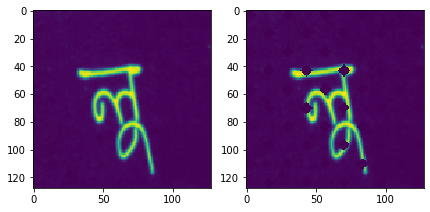

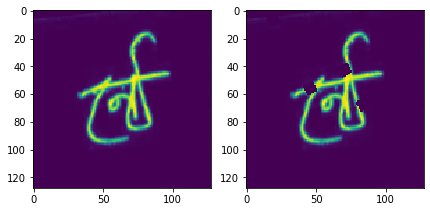

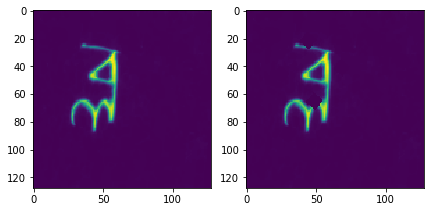

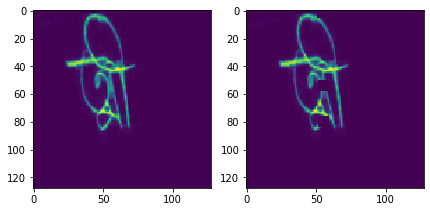

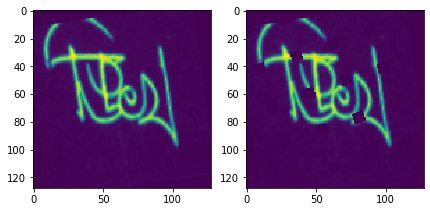

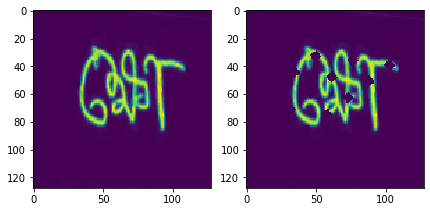

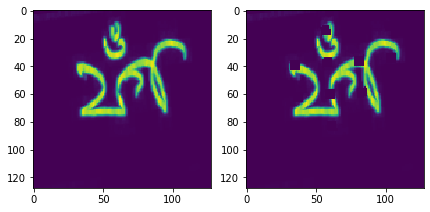

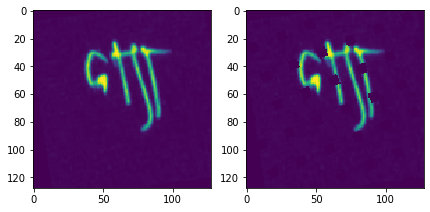

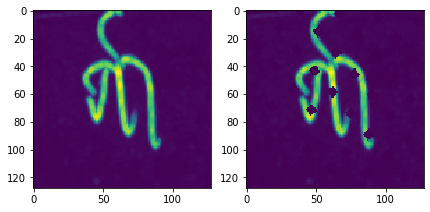

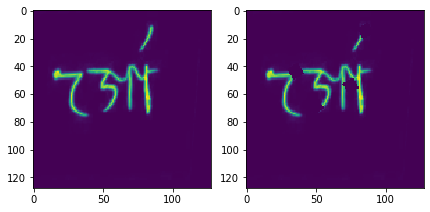

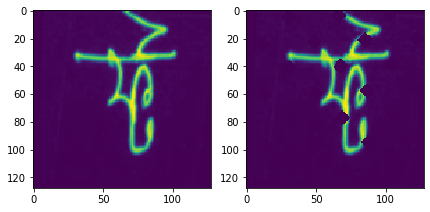

In [258]:
from trans import GridMask
# gm = GridMask(C.image_size[0] * 0.1, C.image_size[0] * 0.4, ratio=0.6, rotate=360, mode=1).to('cuda')
print(C)
gm = GridMask(C.image_size[0] * 0.15, C.image_size[0] * 0.25, ratio=0.7, rotate=360, mode=1).to('cuda')

i = 0
for x, y in dl:
    x_aug = gm(x.to('cuda')).to('cpu')
    
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.imshow(x[0][0])
    plt.subplot(1,2,2)
    plt.imshow(x_aug[0][0])
    plt.title("")
    plt.show()
    
    i += 1
    if i > 10 : break

### mixup

In [ ]:
from torch.utils.data.dataloader import DataLoader
dl = DataLoader(t, batch_size=4, shuffle=True)


In [ ]:
i = 0
for x, y in dl:
    #print(y[0].shape)
    
    ## [B,3] -> [3, B]
    mix_x, mix_y1, mix_y2, mix_y3 = mixup_multi_targets(x, y[:, 0], y[:, 1], y[:, 2])
    #print(mix_x.shape)
    
    l1 = mix_y1[0]
    l2 = mix_y2[1]
    l3 = mix_y3[2]
    #print(l1.shape)
    #print(l2.shape)
    #print(l3.shape)
    #print(l1)
    
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.imshow(x[0][0])
    plt.subplot(1,2,2)
    plt.imshow(mix_x[0][0])
    plt.title("")
    plt.show()
    
    i += 1
    if i >= 2 : break

In [ ]:
BS = 2
C = 3
y_pred = torch.from_numpy( np.array( [ [0, .2, .8], [0, 0, 1] ,[0.9, 0., 0.1] ] ) )

y_onehot      = torch.from_numpy( np.array( [ [0,0,1], [0,0,1] ,[0,0,1] ] ) )
y      = torch.from_numpy( np.array( [2,2,2] ) )

#mixup_cross_entropy_loss()
y_pred

print( torch.nn.functional.cross_entropy(y_pred, y) )
print( mixup_cross_entropy_loss(y_pred, y_onehot) )

In [ ]:
print(y)

In [ ]:
y_onehot_2 = torch.from_numpy( np.array( [ [0, .2, .8], [0,0,1] ,[0.9, 0, 0.1] ] ) )

### perfect pred
print( mixup_cross_entropy_loss(y_pred, y_onehot_2) )

In [ ]:
### bad pred 1
y_pred_2 = torch.from_numpy( np.array( [ [.9, .1, .0], [0, 0.5, 0.5] ,[0.1, 0.4, 0.5] ] ) )

print( mixup_cross_entropy_loss(y_pred_2, y_onehot_2) )


In [ ]:
### bad pred 3
y_pred_3 = torch.from_numpy( np.array( [ [1./3, 1./3, 1./3], [1./3, 1./3, 1./3] ,[1./3, 1./3, 1./3] ] ) )

print( mixup_cross_entropy_loss(y_pred_3, y_onehot_2) )


In [ ]:
y_pred = y_pred_3.to('cuda:0')

y_pred